## Categorical Variables and One hot Encoding

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Using Pandas First

In [11]:
dummies = pd.get_dummies(df['Car Model'])
dummies = dummies.replace(True,1)
dummies = dummies.replace(False,0)
dummies

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15904\927762252.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummies = dummies.replace(False,0)


,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

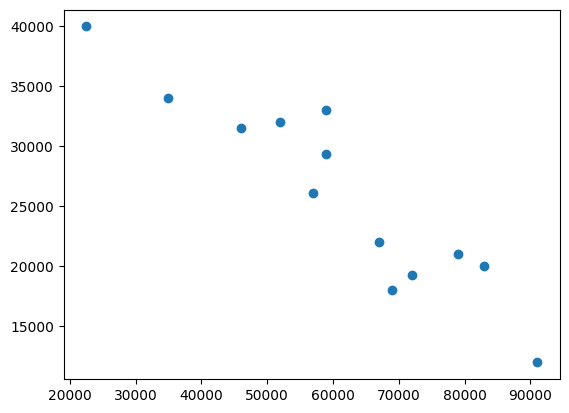

In [13]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [20]:
type(dummies['BMW X5'][0])

numpy.int64

In [21]:
merged = pd.concat([df,dummies],axis= 'columns')
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [24]:
final = merged.drop(columns = ['Car Model','Mercedez Benz C class'])

In [25]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


# <font color="red"> Dummy Variable Trap</font>

When you can derive one variable from other variables, they are known to be multi-colinear. Here if you know values of Audi A5 and BMW X5 then you can easily infer value of Mercedez Benz C class, i.e. Audi A5 =0 and BMW X5=0. There for these state variables are called to be multi-colinear. In this situation linear regression won't work as expected. Hence you need to drop one column.

## NOTE: sklearn library takes care of dummy variable trap hence even if you don't drop one of the state columns it is going to work, however we should make a habit of taking care of dummy variable trap ourselves just in case library that you are using is not handling this for you

In [27]:
X = final.drop('Sell Price($)',axis='columns')
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [28]:
y=final['Sell Price($)']

In [29]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [31]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [33]:
model.fit(X,y)

LinearRegression()

In [35]:
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [45]:
model.predict(pd.DataFrame([[45000,4,0,0]],columns= ['Mileage','Age(yrs)','Audi A5','BMW X5']))

array([36991.31721061])

In [46]:
model.predict(pd.DataFrame([[86000,7,0,1]],columns= ['Mileage','Age(yrs)','Audi A5','BMW X5']))

array([11080.74313219])

In [47]:
model.score(X,y)

0.9417050937281082

# <font color="purple"> Using sklearn OneHotEncoder</font>

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [54]:
dfle = df
df['Car Model']= le.fit_transform(df['Car Model'])
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [56]:
X=df[['Car Model','Mileage','Age(yrs)']].values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [58]:
y=dfle['Sell Price($)'].values
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000], dtype=int64)

In [59]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('Car Model',OneHotEncoder(),[0])], remainder = 'passthrough')

In [60]:
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [61]:
X=X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [64]:
final.sample()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
7,72000,19300,6,1,0


In [63]:
model.fit(X,y)

LinearRegression()

In [70]:
model.predict([[0,1,45000,4]])

array([36991.31721062])

In [71]:
model.predict([[1,0,86000,7]])

array([11080.74313219])

In [69]:
model.score(X,y)

0.9417050937281082

# DONE